In [38]:
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import json
import re

### Данные

In [39]:
def open_file(name):
    with open(name, 'rb') as f:
        book_storage = pickle.load(f)
    return book_storage

In [40]:
data = pd.read_csv("/Users/Stoneberry/Desktop/papers/master/data from names/database2.csv", sep=";")
data.head()

,Unnamed: 0,Название,Местоположение,На карте,Номер,Адрес электронной почты,Адрес сайта,Описание,Принадлежность,Подчинение,Тэги,Изображение,Регион,Район
0,0,Аксёновская сельская библиотека-филиал № 4,Галичский район,"{""coordinates"":[42.50301500000001,58.309780999...","[{""comment"":"""",""value"":""74943721442""}]",biblioteka-gorkogo.galich@yandex.ru,NaN,"<p style=""text-align:left""><span>Библиотека ос...",mincult,Галичский район,NaN,"{""title"":""1.jpg"",""url"":""https://all.culture.ru...",Костромская,Костромская
1,1,Мелёшинская сельская библиотека-филиал № 15,Галичский район,"{""coordinates"":[42.54122,58.438008],""type"":""Po...","[{""comment"":"""",""value"":""74943721442""}]",biblioteka-gorkogo.galich@yandex.ru,NaN,"<p style=""text-align:left""><span> Библиотека о...",mincult,Галичский район,NaN,"{""title"":""1.jpg"",""url"":""https://all.culture.ru...",Костромская,Костромская
2,2,Ряжская центральная библиотека,Ряжский район,"{""coordinates"":[40.06328100000002,53.708139000...","[{""comment"":"""",""value"":""74913222841""}]",ryagsk-biblioteka2010@yandex.ru,http://www.ryajsk-lib.ru,"<p style=""text-align:left""><span>В феврале 186...",mincult,Ряжский район,NaN,"{""title"":""IMG_0449.JPG"",""url"":""https://all.cul...",Рязанская,Рязанская
3,3,Левковская сельская библиотека-филиал № 12,Галичский район,"{""coordinates"":[42.187105,58.552082999999996],...","[{""comment"":"""",""value"":""74943721442""}]",biblioteka-gorkogo.galich@yandex.ru,NaN,"<p style=""text-align:left""><span>Левковская се...",mincult,Галичский район,NaN,"{""title"":""2.jpg"",""url"":""https://all.culture.ru...",Костромская,Костромская
4,4,Сасовская центральная библиотека,Сасово,"{""coordinates"":[41.91434900000001,54.341094999...","[{""comment"":"""",""value"":""74913351408""}]",foliant@pochtamt.ru,NaN,"<p style=""text-align:left""><span><span>Сасовск...",mincult,Сасово,"[{""sysName"":""dlya-detey"",""name"":""Для детей"",""i...","{""title"":""Фото ЦБ.jpg"",""url"":""https://all.cult...",Рязанская,Рязанская


In [41]:
person_data3 = pd.read_csv('/Users/Stoneberry/Desktop/papers/master/data from names/FINAL_PERSON_DATA.csv', sep=';')

In [42]:
person_data3.head()

,index,date of birth,ethnic group,field of work,influenced by,label,"languages spoken, written or signed",movement,nominated for,occupation,place of birth,place of burial,place of death,real name,residence,sex or gender
0,0,+1909-03-29t00:00:00z,0,0,0,NaN,buryat,0,0,"children's writer,poet,prosaist,translator,con...",transbaikal oblast,0,ulan-ude,"абидуев, б.",0,male
1,1,+1920-02-29t00:00:00z,0,0,0,fyodor abramov,russian,socialist realism,0,"writer, literary critic, prosaist, literary hi...",verkola,arkhangelsk oblast,saint petersburg,"абрамов, фёдор, а.",0,male
2,2,+1910-04-18t00:00:00z,0,0,0,leonid agakov,"russian, chuvash",0,0,writer,0,0,cheboksary,"агаков, л.",0,male
3,3,+1939-06-18t00:00:00z,0,0,0,NaN,0,0,0,poet,0,0,0,"адрианов, ю., а.",0,male
4,4,+1933-10-29t00:00:00z,0,0,0,abuzar aydamirov,"russian, chechen",0,0,poet,meskety,0,meskety,"айдамиров, а., а.",0,male


Про кого смогли найти информацию:

In [43]:
name_index = pd.read_csv('/Users/Stoneberry/Desktop/papers/master/data from names/names.csv', sep=';')
name_index["index"] = name_index["index"].str.split(",").apply(lambda x: [int(i) for i in x])
name_index = name_index.set_index('name')

In [44]:
TRUE_NAMES = set(name_index.index) & set(person_data3['real name'])
TRUE_NAMES = {i: name_index['index'][i] for i in TRUE_NAMES}

In [45]:
len(TRUE_NAMES)

423

In [46]:
plot_path = "/Users/Stoneberry/Desktop/papers/master/stat/"

def myplot(x, y, title, xname, yname, name=False, rotation=45,
           type_='bar', label=None, text = False):
   
    global plot_path
        
    fig = plt.figure(figsize = (18, 8))
    ax = fig.gca()
    
    if type_ == 'scatter':
        plt.scatter(x, y, color = 'burlywood', label=label)
    
    else:
        plt.bar(x, y, color = 'burlywood')
        plt.xticks(rotation = rotation) #rotation='vertical')
        
    if text:
        for index, item in enumerate(zip(x, y)):
            plt.annotate(text[index], # this is the text
                         item, # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center')
    
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title(title)
    
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gainsboro', linestyle='dashed')
    ax.xaxis.grid(color='gainsboro', linestyle='dashed')
    
    if name:
        plt.savefig(plot_path + name + ".svg", format='svg', dpi=1200)

In [47]:
def preproc(line):
    if isinstance(line, str):
        line = re.sub(' \(.*?\)', '', line.lower())
        line = re.sub(' +', ' ', line)
        line = re.sub('^ ', '', line)
        line = re.sub(' $', '', line)
    return line

## Какие самые популярные люди

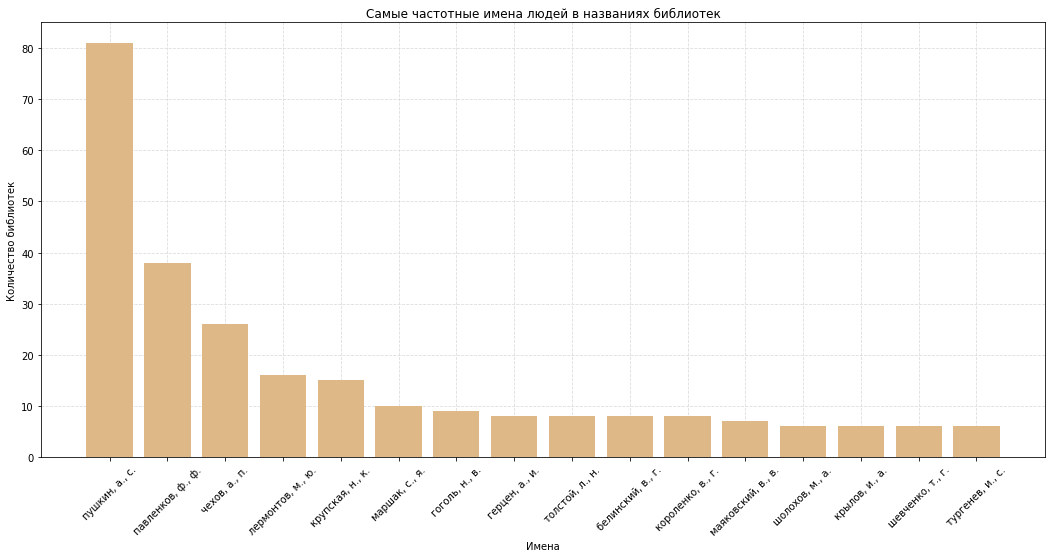

In [48]:
res = {}

for name, indexes in sorted(TRUE_NAMES.items(), key=lambda kv: len(kv[1]), reverse=True):
    if len(indexes) > 5: res[name] = len(indexes)

myplot(res.keys(), res.values(),
       'Самые частотные имена людей в названиях библиотек', 
       'Имена', 'Количество библиотек',
        name = 'popular_person')

## Какие популярные профессии

In [49]:
prof_count = defaultdict(int)

for line in person_data3['occupation']:
    if line not in ('0', 0):
        for prof in line.split(','):
            prof_count[preproc(prof)] += 1

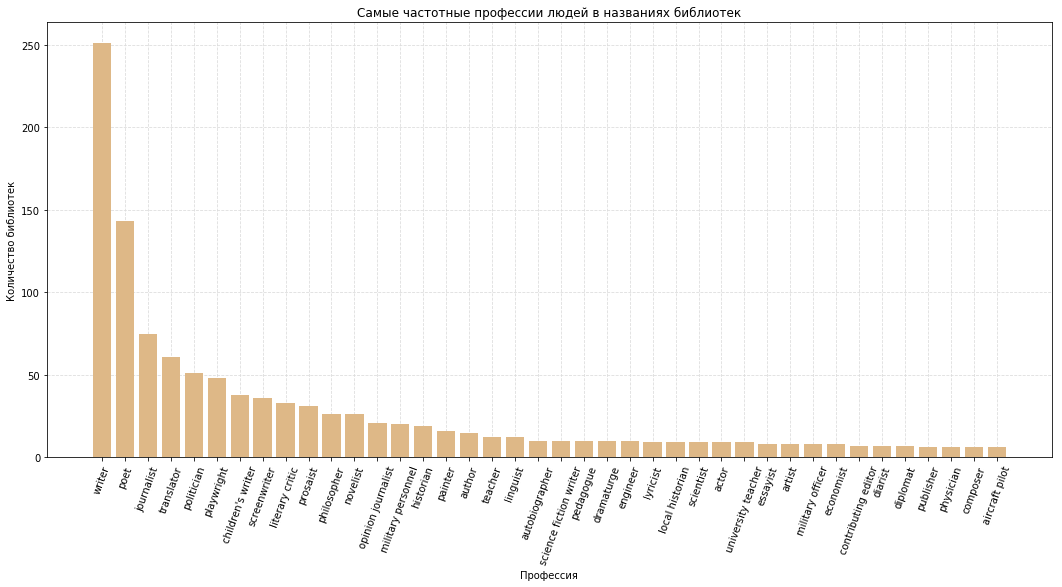

In [50]:
res = {}

for name, count in sorted(prof_count.items(), key=lambda kv: kv[1], reverse=True):
    if count > 5: res[name] = count
        
        
myplot(res.keys(), res.values(),
       'Самые частотные профессии людей в названиях библиотек', 
       'Профессия', 'Количество библиотек', rotation = 70,
        name = 'popular_prof')

## Этнические группы

In [51]:
res = defaultdict(int)
non_russians = []

for index in person_data3.index:
    line = person_data3['ethnic group'][index]
    if isinstance(line, str) and line != '0':
        rus = False
        for word in line.split(','):
            word = re.sub('[^ \f\n\r\t\v\w]', '', word)
            if word in ('russians', 'ukrainians'): rus = True
            res[word] += 1
        if not rus:
            name = person_data3['real name'][index]
            non_russians.append(name)

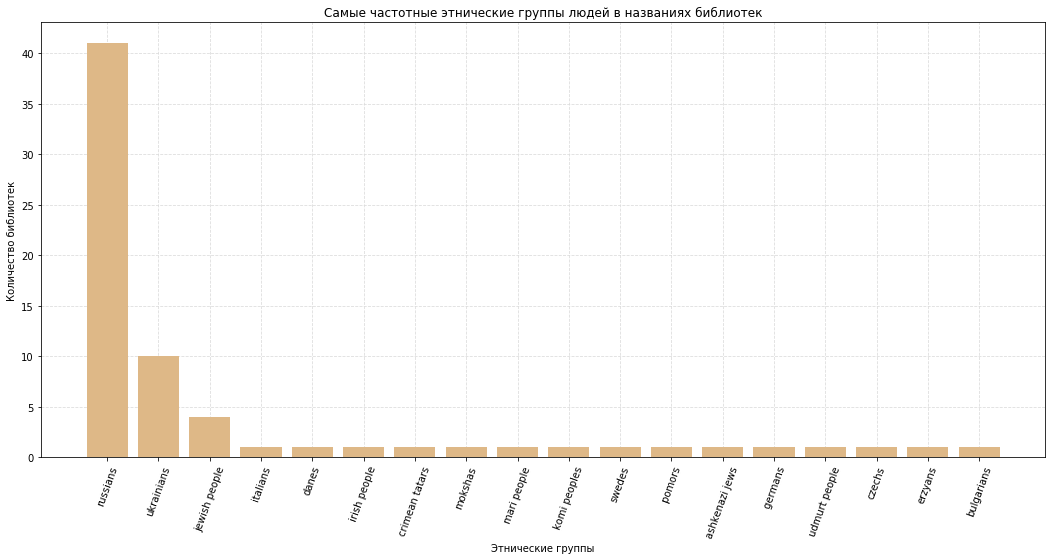

In [52]:
res = sorted(res.items(), key=lambda kv: kv[1], reverse=True)

myplot([i[0] for i in res], [i[1] for i in res],
       'Самые частотные этнические группы людей в названиях библиотек', 
       'Этнические группы', 'Количество библиотек', rotation = 70,
        name = 'ethnic_group')

In [53]:
data2 = person_data3.loc[person_data3['real name'].isin(non_russians)]#['ethnic group']
data2[['ethnic group', 'languages spoken, written or signed', 'occupation', 'real name']]

,ethnic group,"languages spoken, written or signed",occupation,real name
9,italians,"italian, latin","politician, philosopher, political theorist, l...","алигьери, данте"
11,danes,danish,"writer, poet, novelist, children's writer, aut...","андерсен, х., к."
22,jewish people,russian,"writer, screenwriter","бакланов, г., я."
49,jewish people,"english, russian","poet, translator, essayist, writer, playwright...","бродский, иосиф"
72,irish people,english,"writer, novelist, activist, composer, prosaist...","войнич, э., л."
89,crimean tatars,"turkish, russian","politician, publisher, journalist, writer","гаспринский, и."
170,mokshas,russian,historian,"ключевский, в., о."
171,mari people,mari,"writer, poet, translator, journalist","колумб, в., х."
206,komi peoples,"komi, finnish, russian","poet, translator, linguist","куратов, и., а."
217,swedes,swedish,"screenwriter, children's writer, novelist, writer","линдгрен, а."


## Пол

Вдохновлено: https://www.citylab.com/equity/2015/11/mapping-the-sexism-of-city-street-names/414094/

In [54]:
gender = Counter(person_data3['sex or gender'])

In [55]:
del gender['0']

In [56]:
30/429 * 100

6.993006993006993

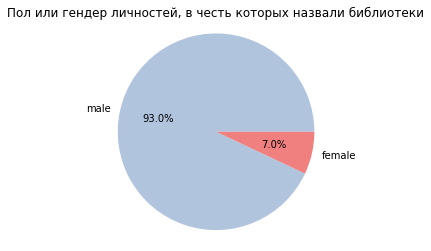

In [57]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'

fig1, ax1 = plt.subplots()
ax1.pie(gender.values(), labels=gender.keys(),
        autopct='%1.1f%%', colors = ['lightsteelblue', 'lightcoral'])
ax1.axis('equal') 
plt.title('Пол или гендер личностей, в честь которых назвали библиотеки')
plt.savefig(plot_path + "gender.svg",  format='svg', dpi=1200)

### Женщины

In [58]:
female_data = person_data3.loc[person_data3['sex or gender'] == 'female']

In [59]:
female_data.head()

,index,date of birth,ethnic group,field of work,influenced by,label,"languages spoken, written or signed",movement,nominated for,occupation,place of birth,place of burial,place of death,real name,residence,sex or gender
16,16,"['+1889-06-11t00:00:00z', '+1889-06-23t00:00:0...",russians,0,"['mikhail lermontov', 'alexander pushkin', 'le...",anna akhmatova,russian,acmeist poetry,"nobel prize in literature, nobel prize in lite...","writer, translator, literary critic, poet, aut...",odessa,cemetery in komarovo,domodedovo,"ахматова, а., а.","odessa, saint petersburg",female
29,29,+1901-02-04t00:00:00z,0,0,0,agniya barto,russian,socialist realism,0,"poet, translator, children's writer, screenwri...",kaunas,novodevichy cemetery,moscow,"барто, а., л.",0,female
37,37,+1910-05-16t00:00:00z,0,0,0,olga bergholz,russian,0,0,"journalist, poet, writer, playwright, children...",saint petersburg,literatorskie mostki,saint petersburg,"берггольц, о.",0,female
46,46,+1929-02-25t00:00:00z,0,0,0,NaN,0,0,0,0,perm krai,0,0,"бояршинова, э.",0,female
67,67,+1868-09-20t00:00:00z,0,0,0,vera velichkina,russian,0,0,"physician, translator",0,0,0,"величкина, в., м.",0,female


### Имена

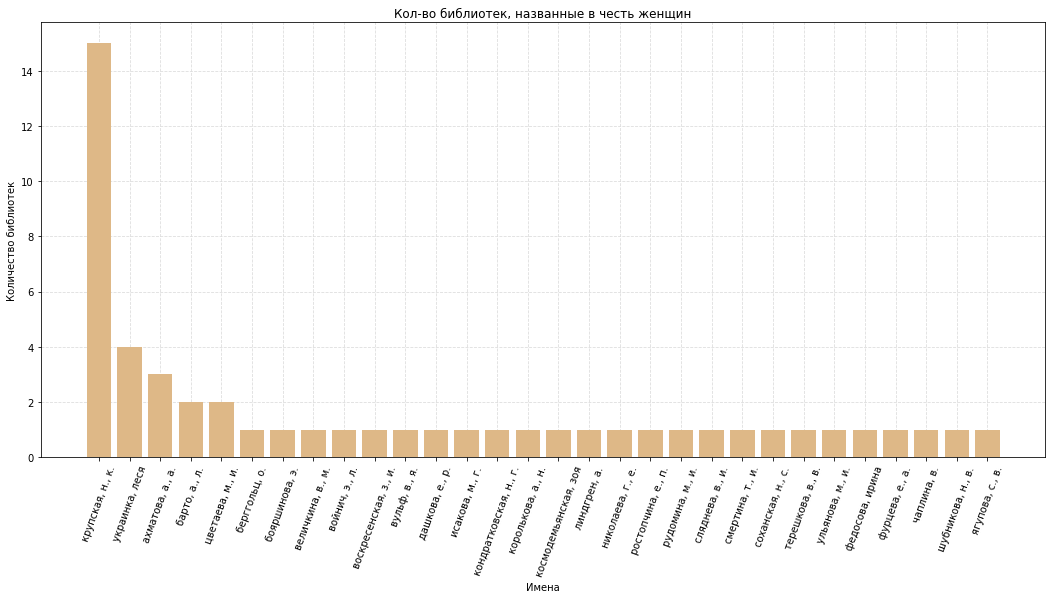

In [60]:
res = {}

for name in female_data['real name']:
    res[name] = len(TRUE_NAMES[name])
    
res = sorted(res.items(), key=lambda kv: kv[1], reverse=True)
        
myplot([i[0] for i in res], [i[1] for i in res],
       'Кол-во библиотек, названные в честь женщин', 
       'Имена', 'Количество библиотек', rotation = 70,
        name = 'female_lib_count')

###  Профессии

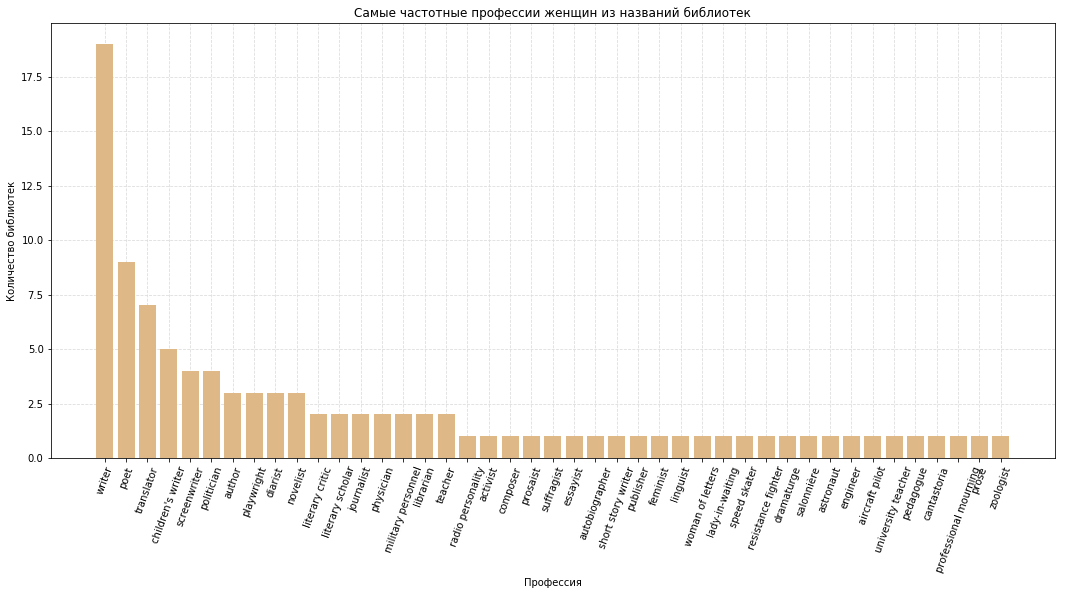

In [61]:
f_prof_count = defaultdict(int)

for line in female_data['occupation']:
    if line not in ('0', 0):
        for prof in line.split(','):
            f_prof_count[preproc(prof)] += 1

res = sorted(f_prof_count.items(), key=lambda kv: kv[1], reverse=True)
        
myplot([i[0] for i in res], [i[1] for i in res],
       'Самые частотные профессии женщин из названий библиотек', 
       'Профессия', 'Количество библиотек', rotation = 70,
        name = 'female_prof')

#### man vs woman

In [62]:
man = person_data3.loc[person_data3['sex or gender'] == 'male']#['occupation']

In [63]:
m_prof_count = defaultdict(int)

for line in man['occupation']:
    if line not in ('0', 0):
        for prof in line.split(','):
            m_prof_count[preproc(prof)] += 1

In [64]:
set(f_prof_count.keys()) - set(m_prof_count.keys())

{'activist',
 'cantastoria',
 'feminist',
 'lady-in-waiting',
 'professional mourning',
 'prose',
 'salonnière',
 'speed skater',
 'suffragist',
 'woman of letters'}

In [65]:
set(m_prof_count.keys()) - set(f_prof_count.keys())

{'actor',
 'aerospace engineer',
 'africanist',
 'agronomist',
 'animator',
 'anthropologist',
 'archaeologist',
 'architect',
 'art collector',
 'art historian',
 'artist',
 'association football player',
 'astronomer',
 'bibliographer',
 'biographer',
 'biologist',
 'book collector',
 'botanist',
 'businessperson',
 'camera operator',
 'caricaturist',
 'chemist',
 'cinematographer',
 'civil engineer',
 'collector of fairy tales',
 'contributing editor',
 'critic',
 'cultural historian',
 'diplomat',
 'director',
 'drama teacher',
 'ecologist',
 'economist',
 'editor',
 'educator',
 'entomologist',
 'entrepreneur',
 'esperantist',
 'ethnographer',
 'explorer',
 'fabulist',
 'fighter pilot',
 'film actor',
 'film director',
 'film score composer',
 'folklorist',
 'geneticist',
 'geographer',
 'geologist',
 'guitarist',
 'historian',
 'human rights activist',
 'intellectual',
 'interpreter',
 'inventor',
 'jurist',
 'lawyer',
 'lecturer',
 'librettist',
 'literary historian',
 'local hi

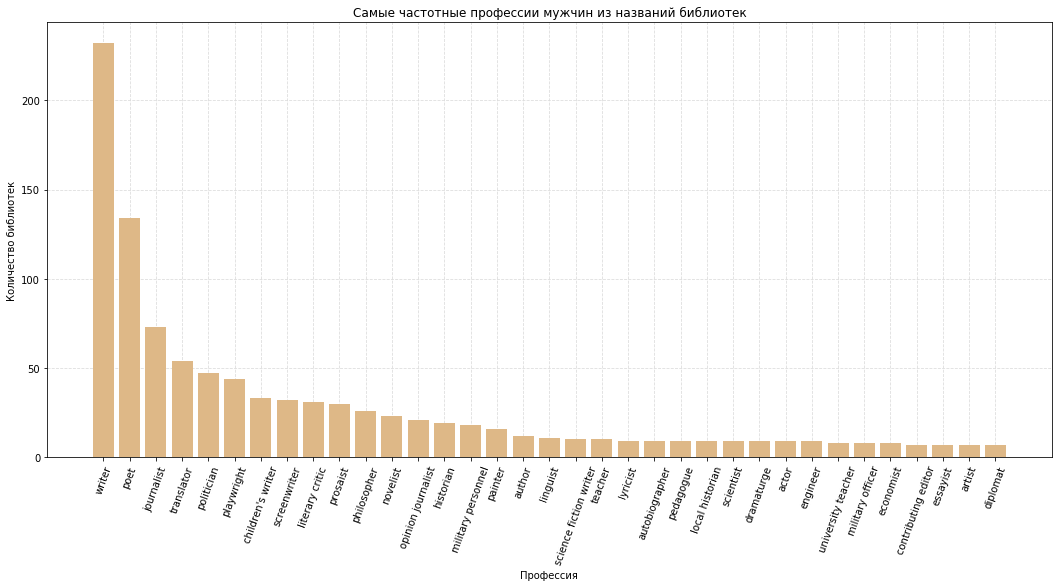

In [66]:
res = {}

for name, indexes in sorted(m_prof_count.items(), key=lambda kv: kv[1], reverse=True):
    if indexes > 5: res[name] = indexes
        
myplot(res.keys(), res.values(),
       'Самые частотные профессии мужчин из названий библиотек', 
       'Профессия', 'Количество библиотек', rotation = 70,
        name = 'male_prof')

### В каких регионах

In [67]:
res = defaultdict(int)

for name in female_data['real name']:
    for index in TRUE_NAMES[name]:
        res[data['Регион'][index]] += 1

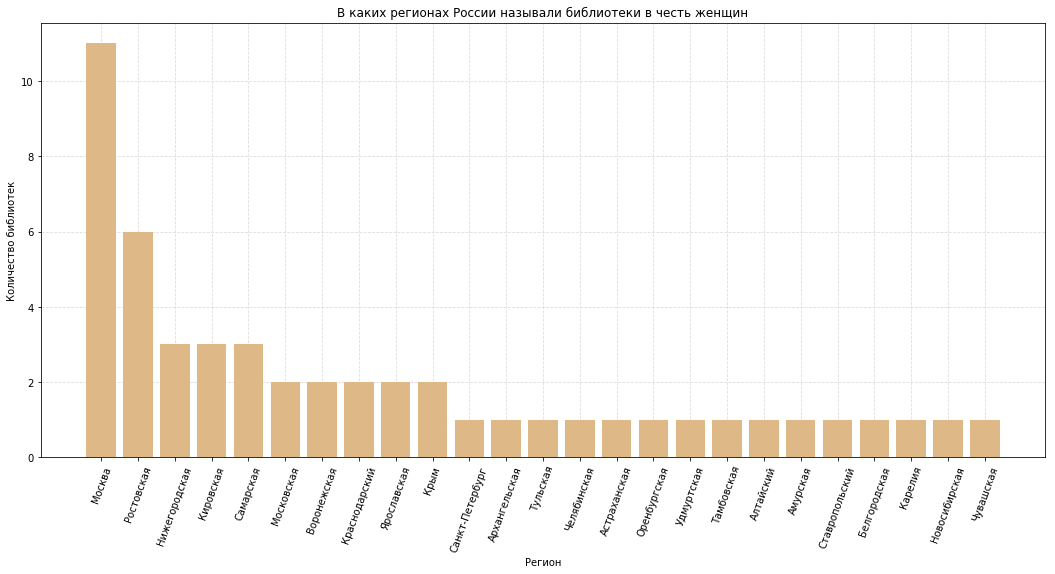

In [68]:
res = sorted(res.items(), key=lambda kv: kv[1], reverse=True)
        
myplot([i[0] for i in res], [i[1] for i in res],
       'В каких регионах России называли библиотеки в честь женщин', 
       'Регион', 'Количество библиотек', rotation = 70,
        name = 'female_region')

In [69]:
person_data3[person_data3['real name'] == name]['sex or gender'].values[0]

'female'

In [70]:
region_gender = defaultdict(dict)

for name in TRUE_NAMES:
    gender = person_data3[person_data3['real name'] == name]['sex or gender'].values[0]
    if gender != '0':
        for index in TRUE_NAMES[name]:
            region = data['Регион'][index]
            if region not in region_gender:
                region_gender[region]['male'] = 0
                region_gender[region]['female'] = 0
            region_gender[region][gender] += 1

In [71]:
with open('/Users/Stoneberry/Desktop/papers/master/region stat data/region_gender.pickle', 'wb') as f:
    pickle.dump(region_gender, f)

Республика Калмыкия - 1 библиотека и она в честь мужчины

Женщины: 
    Удмуртская Республика - 20 (1 женская 7 мужчин)
    Новосибирская область - 22 (1 женская 2 мужчин)

#### Соединяем со статистикой

In [72]:
# capitals = {'Севастополь': 'Республика Крым', 
#             'Москва': 'Московская область', 
#             'Санкт-Петербург': 'Ленинградская область'}

# for name in capitals:
#     reg = capitals[name]
#     region_gender[reg]['female'] += region_gender[name]['female']
#     region_gender[reg]['male'] += region_gender[name]['male']

In [73]:
reg_stat_data = open_file('/Users/Stoneberry/Desktop/papers/master/region stat data/reg_stat_data.pickle')

In [74]:
fem = []
man = []

for name in reg_stat_data.index:
    if name in region_gender:
        val1 = region_gender[name]['female']
        val2 = region_gender[name]['male']
    else:
        val1, val2 = 0, 0
    fem.append(val1)
    man.append(val2)

In [75]:
reg_stat_data['female'] = fem
reg_stat_data['male'] = man
reg_stat_data['part_female'] = reg_stat_data['female']/reg_stat_data['N_libr']
reg_stat_data['part_male'] = reg_stat_data['male']/reg_stat_data['N_libr']

In [76]:
reg_stat_data.head()

,№,Субъект России,Плотность населения чел/км²,Население. человек,Площадь км²,Фед. округ,N_people_2018,N_libr,Location,federal_district,District,N_district,female,male,part_female,part_male
Название,,,,,,,,,,,,,,,,
Москва,1,Москва,4956.06,12692466.0,2561.0,ЦФО,12560873.0,444,"(POLYGON ((37.24789428710932 55.5889129638673,...",Центральный,[],125,11,87,0.024775,0.195946
Санкт-Петербург,2,Санкт-Петербург,3843.90,5392992.0,1403.0,СЗФО,5367912.0,329,"(POLYGON ((29.71916580200212 59.9754180908206,...",Северо-Западный,"[Адмиралтейский, Василеостровский, Выборгский,...",18,1,36,0.003040,0.109422
Севастополь,3,Севастополь,519.48,448829.0,864.0,ЮФО,439941.0,24,"POLYGON ((33.66316223144543 44.75286483764648,...",Южный,"[Балаклавский, Гагаринский, Ленинский, Нахимов...",4,0,3,0.000000,0.125000
Московская,4,Московская область,173.42,7687647.0,44329.0,ЦФО,7551516.0,440,"POLYGON ((37.76903533935564 56.94193267822288,...",Центральный,"[Волоколамский, Воскресенский, Дмитровский, Ег...",36,2,17,0.004545,0.038636
Ингушетия,5,Республика Ингушетия,162.24,506688.0,3123.0,СКФО,492718.0,2,"POLYGON ((44.89275360107422 43.54350662231451,...",Северо-Кавказский,"[Джейрахский, Малгобекский, Назрановский, Сунж...",4,0,0,0.000000,0.000000


### Зависимость от федерального округа

In [77]:
df = reg_stat_data[['federal_district', 'N_libr', 'female',
                    'male', 'part_female', 'part_male']]

df = df.groupby('federal_district').sum()

df["Rang from center"] = ['Вост_4', 'Вост_1', 'Сев_1', 'Юг_2',
                          'Вост_3', 'Вост_2', 'Центр_0', 'Юг_1']

In [78]:
df

,N_libr,female,male,part_female,part_male,Rang from center
federal_district,,,,,,
Дальневосточный,287,1,20,0.023256,1.011747,Вост_4
Приволжский,1758,12,183,0.135278,1.637904,Вост_1
Северо-Западный,909,3,93,0.051741,1.147538,Сев_1
Северо-Кавказский,443,1,15,0.008929,0.751864,Юг_2
Сибирский,594,2,39,0.064286,1.180828,Вост_3
Уральский,804,1,51,0.008264,0.376759,Вост_2
Центральный,3901,20,241,0.066257,1.231752,Центр_0
Южный,850,11,111,0.088000,1.679872,Юг_1


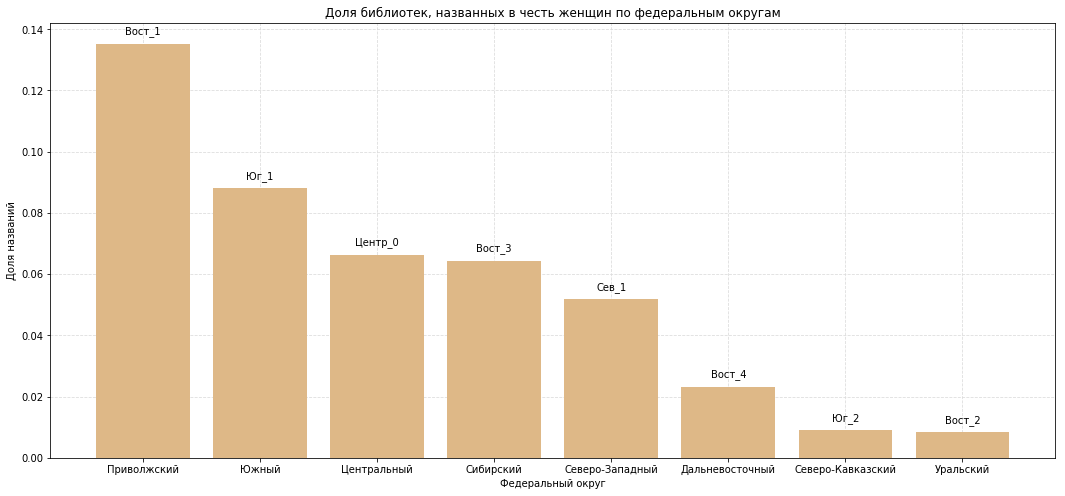

In [79]:
df = df.sort_values('part_female', ascending=False)

myplot(df.index, df['part_female'],
       'Доля библиотек, названных в честь женщин по федеральным округам', 
       'Федеральный округ', 'Доля названий', rotation=0,
        name = 'fdistrict_nfemale', text=df['Rang from center'].tolist())

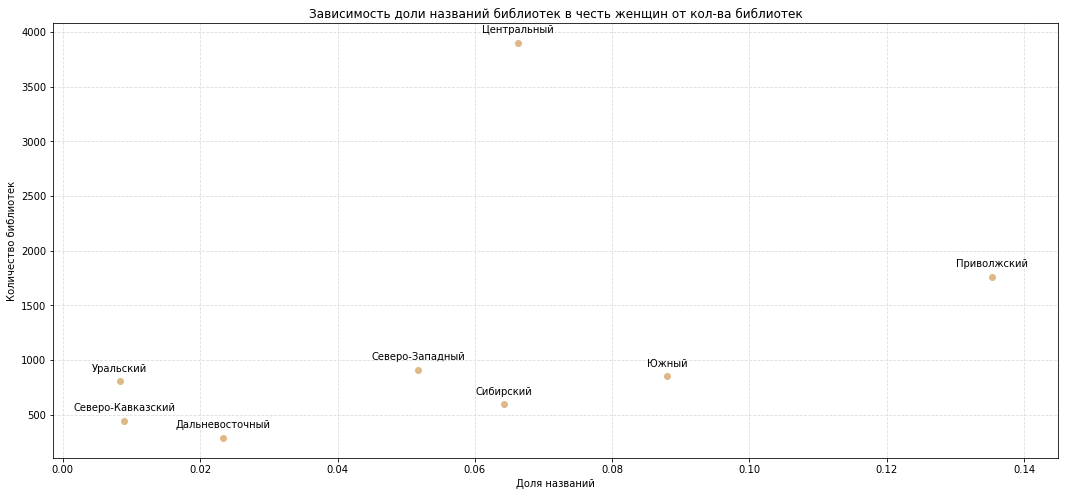

In [80]:
myplot(df['part_female'], df['N_libr'],
       'Зависимость доли названий библиотек в честь женщин от кол-ва библиотек', 
        'Доля названий', 'Количество библиотек', rotation=0,
        name = 'nlibr_nауьфду', type_='scatter', text=df.index.tolist())

In [81]:
df1 = df.drop('Центральный', axis=0)
df1[['N_libr', 'part_female']].corr()

,N_libr,part_female
N_libr,1.000000,0.819142
part_female,0.819142,1.000000
